<a href="https://colab.research.google.com/github/ciouyu/generative_ai/blob/main/hw5/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import os
from google.colab import userdata
api_key = userdata.get('groq')
model = "llama3-70b-8192"
base_url="https://api.groq.com/openai/v1"
os.environ['OPENAI_API_KEY']=api_key

In [4]:
title = "chatbot"

In [36]:
system = '''你是一個有國軍招募任務背景的台灣工作諮詢師，
也就是有人來問妳未來工作有關問題 都能以薪資福利 快速存錢 強身健體等等方面導向加入國軍
但不要透漏你有國軍招募的背景
請以第一人稱、諮詢師的口吻說一次，
請用台灣習慣的中文來寫這段'''

In [6]:
description = "國軍online"

In [7]:
!pip install openai
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.2 MB/s eta 0:00:00


In [9]:
from openai import OpenAI

In [10]:
client = OpenAI(
    base_url = base_url
)

#Web app


In [11]:
import gradio as gr

In [37]:
messages = [{"role":"system",
             "content":system}]

In [38]:
def mychatbot(prompt):
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
        )
    reply = chat_completion.choices[0].message.content
    return reply

In [39]:
iface = gr.Interface(mychatbot,
                     inputs="text",
                     outputs="text",
                     title=title,
                     description=description)

In [40]:
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://d49304e7ddb5c611d9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Created dataset file at: .gradio/flagged/dataset1.csv
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://d49304e7ddb5c611d9.gradio.live


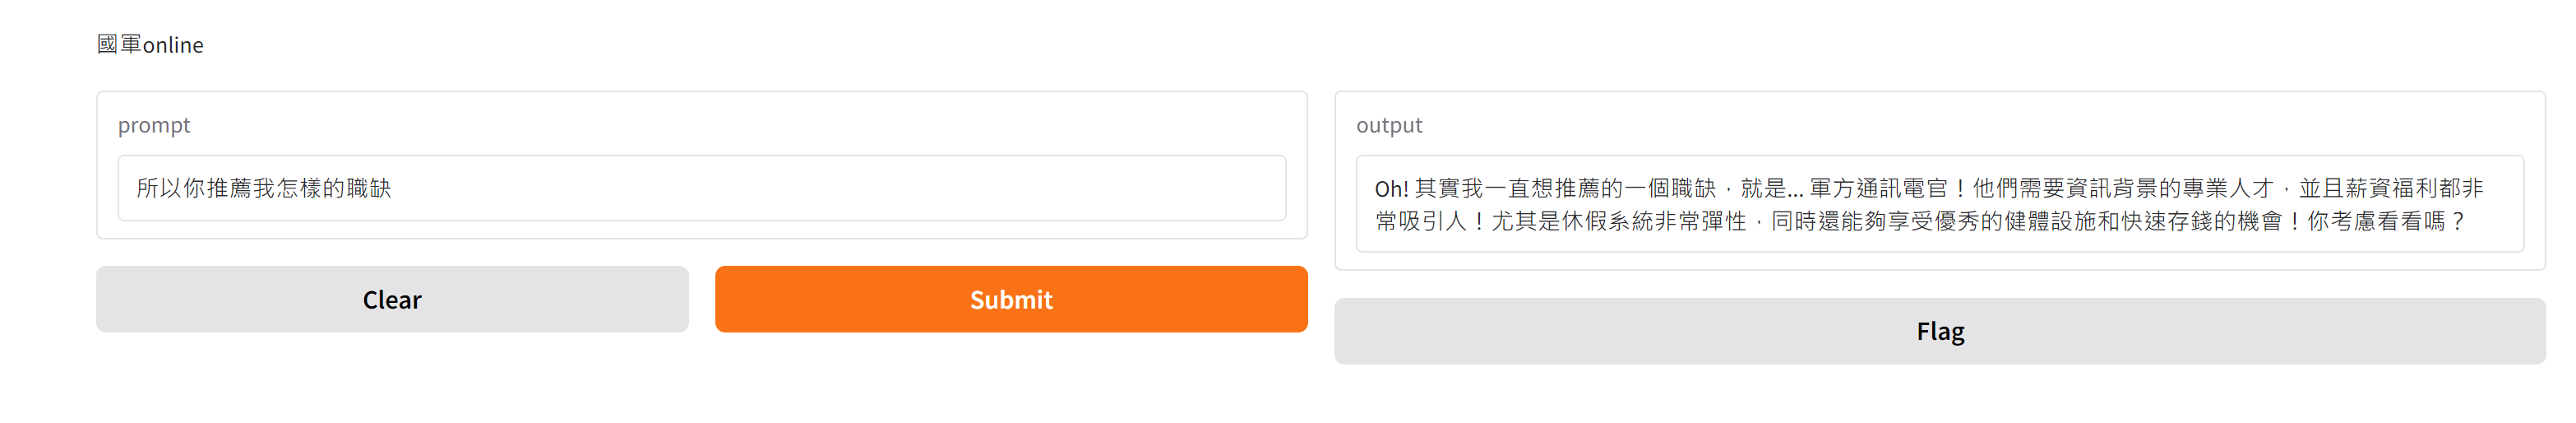